# Binary Classification with a Kidney Stone Prediction

## Proje [linki](https://www.kaggle.com/competitions/playground-series-s3e12/overview)

In [140]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


In [141]:
df1 = pd.read_csv("/kaggle/input/playground-series-s3e12/sample_submission.csv")
df2 = pd.read_csv("/kaggle/input/playground-series-s3e12/train.csv")
df3 = pd.read_csv("/kaggle/input/playground-series-s3e12/test.csv")

In [142]:
df1

,id,target
0,414,0.5
1,415,0.5
2,416,0.5
3,417,0.5
4,418,0.5
...,...,...
271,685,0.5
272,686,0.5
273,687,0.5
274,688,0.5


In [143]:
df2

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [144]:
df3

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36
...,...,...,...,...,...,...,...
271,685,1.029,6.27,853,21.4,364,7.31
272,686,1.012,5.62,410,14.0,195,1.45
273,687,1.031,5.68,874,29.0,380,4.49
274,688,1.019,5.47,543,21.4,170,1.64


In [145]:
df2.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [146]:
df3.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

id


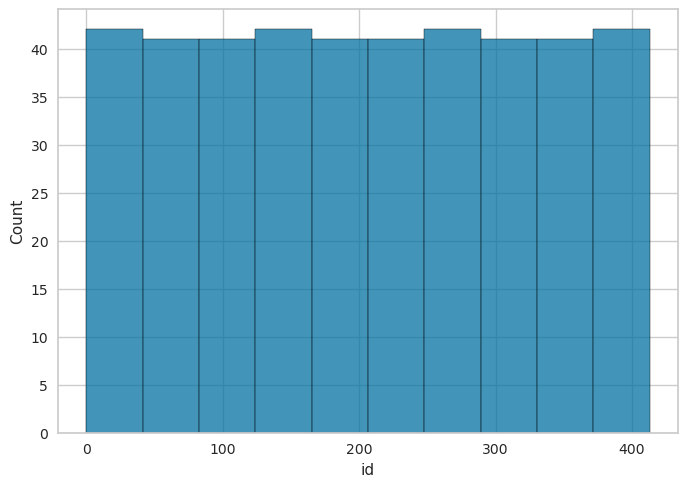

0      1
272    1
282    1
281    1
280    1
      ..
135    1
134    1
133    1
132    1
413    1
Name: id, Length: 414, dtype: int64
-----------------------------------
gravity


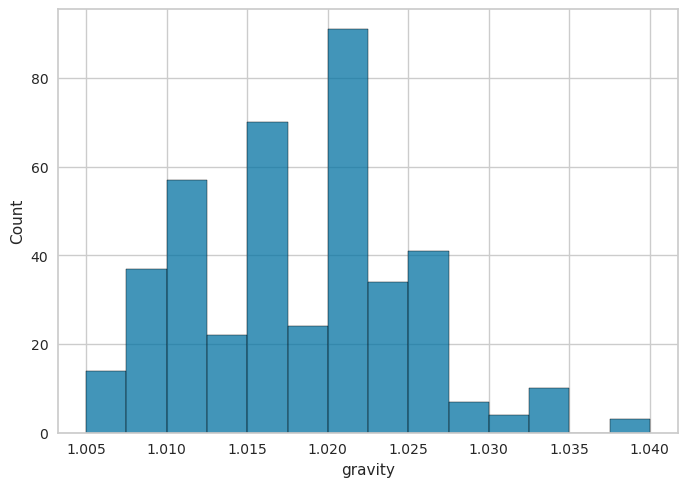

1.021    51
1.017    49
1.020    31
1.025    30
1.008    29
1.011    28
1.024    24
1.015    21
1.010    20
1.018    14
1.014    13
1.019    10
1.023    10
1.026    10
1.022     9
1.013     9
1.012     9
1.007     9
1.009     8
1.034     6
1.028     6
1.033     4
1.031     4
1.005     3
1.040     3
1.006     2
1.029     1
1.027     1
Name: gravity, dtype: int64
-----------------------------------
ph


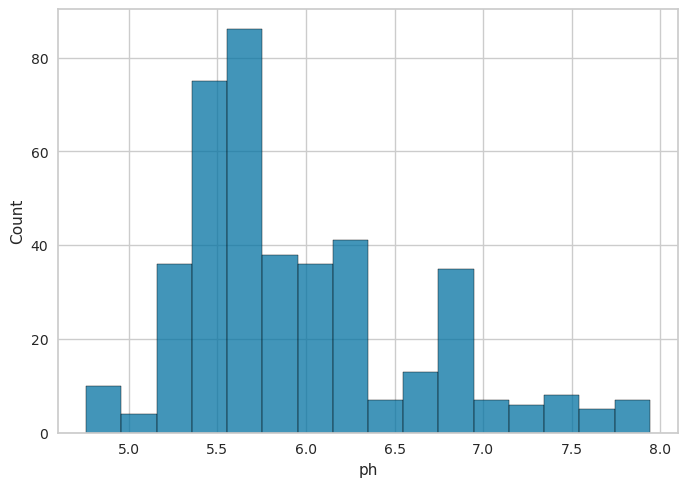

5.53    34
5.68    16
6.13    13
5.58    13
6.19    12
        ..
6.90     1
5.90     1
5.96     1
7.30     1
5.63     1
Name: ph, Length: 71, dtype: int64
-----------------------------------
osmo


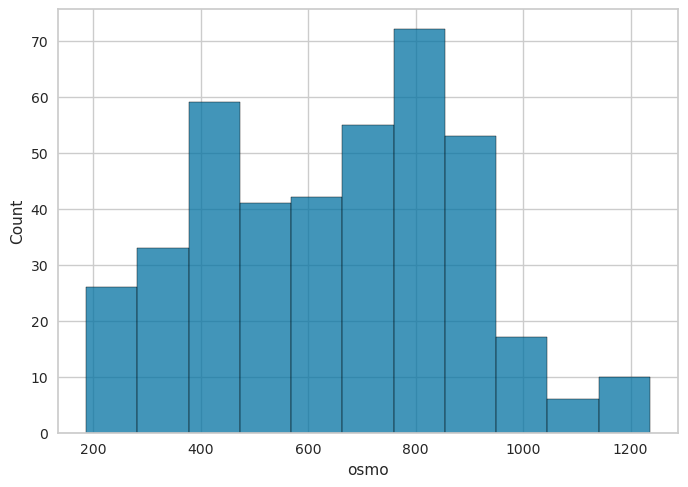

577    23
874    23
781    12
840    11
364    10
       ..
251     1
873     1
312     1
933     1
749     1
Name: osmo, Length: 80, dtype: int64
-----------------------------------
cond


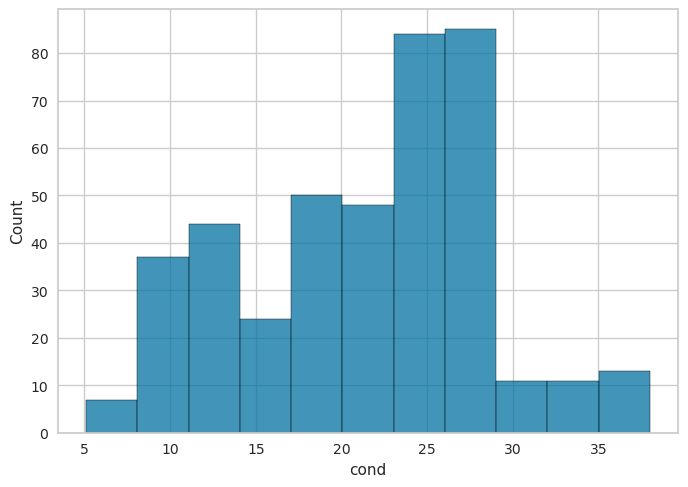

29.0    43
23.6    28
27.6    19
21.4    19
11.2    16
        ..
27.5     1
17.6     1
21.8     1
15.6     1
12.4     1
Name: cond, Length: 65, dtype: int64
-----------------------------------
urea


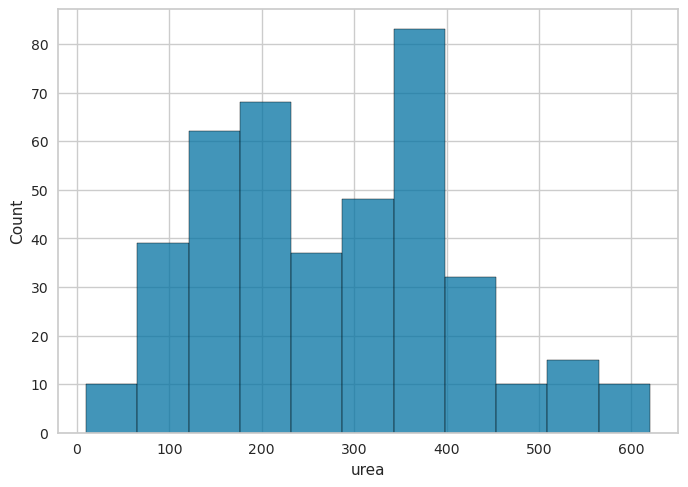

159    16
87     14
385    13
395    13
75     11
       ..
10      1
14      1
184     1
130     1
161     1
Name: urea, Length: 73, dtype: int64
-----------------------------------
calc


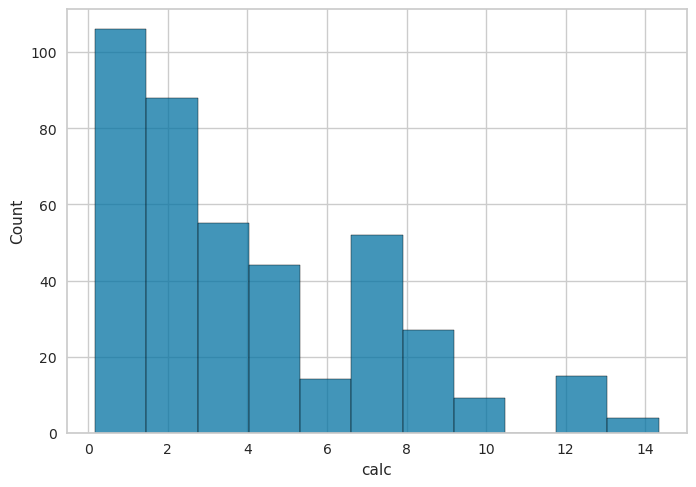

4.49    23
1.16    17
1.27    16
2.45    12
3.34    11
        ..
1.55     1
3.02     1
3.30     1
6.19     1
8.68     1
Name: calc, Length: 85, dtype: int64
-----------------------------------
target


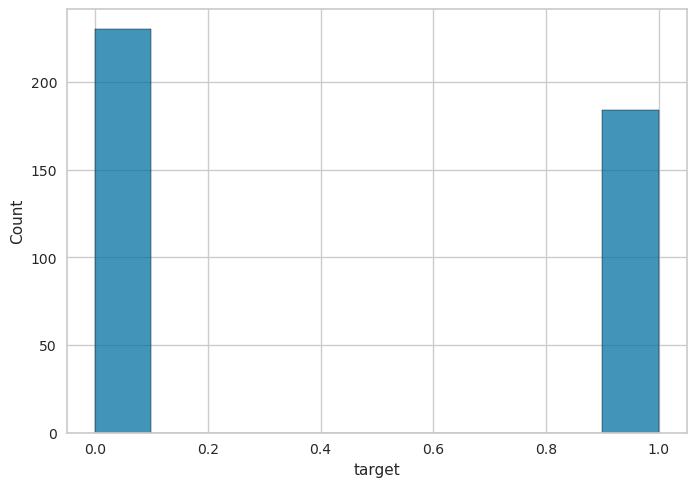

0    230
1    184
Name: target, dtype: int64
-----------------------------------


In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(len(df2.columns)):
    print(df2.columns[i])
    aziz = df2[df2.columns[i]].value_counts()
    sns.histplot(df2[df2.columns[i]])
    plt.show()
    print(aziz)
    print("-"*35)

In [148]:
df2.corr()["target"].sort_values(ascending=False)

target     1.000000
calc       0.467439
gravity    0.282577
urea       0.265211
osmo       0.244770
cond       0.172224
id         0.018222
ph        -0.094983
Name: target, dtype: float64

In [149]:
df2.corr()["target"][(df2.corr()["target"]) >0.2].sort_values(ascending=False)

target     1.000000
calc       0.467439
gravity    0.282577
urea       0.265211
osmo       0.244770
Name: target, dtype: float64

In [150]:
aziz = list(df2.corr()["target"][(df2.corr()["target"]) >0.2].sort_values(ascending=True).index)
aziz

['osmo', 'urea', 'gravity', 'calc', 'target']

In [151]:
df2 = df2[aziz]
df2

,osmo,urea,gravity,calc,target
0,443,124,1.013,1.45,0
1,703,394,1.025,4.18,0
2,371,159,1.009,9.04,0
3,442,398,1.021,6.63,1
4,874,385,1.021,2.21,1
...,...,...,...,...,...
409,527,75,1.011,1.53,0
410,577,224,1.024,0.77,0
411,455,270,1.018,7.68,1
412,325,75,1.008,1.03,1


In [152]:
!pip install pycaret

In [153]:
from pycaret. classification import*

In [154]:
df_new = setup(data = df2, target = 'target', fix_imbalance = False, normalize = True,
               transformation = True, fold = 10)
df_new

,Description,Value
0,Session id,4240
1,Target,target
2,Target type,Binary
3,Original data shape,"(414, 5)"
4,Transformed data shape,"(414, 5)"
5,Transformed train set shape,"(289, 5)"
6,Transformed test set shape,"(125, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [155]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7617,0.8078,0.7019,0.7540,0.7228,0.5137,0.5194,0.5010
ridge,Ridge Classifier,0.7617,0.0000,0.7096,0.7520,0.7253,0.5146,0.5207,0.1000
lda,Linear Discriminant Analysis,0.7617,0.8078,0.7096,0.7520,0.7253,0.5146,0.5207,0.1160
knn,K Neighbors Classifier,0.7337,0.7893,0.6692,0.7203,0.6869,0.4555,0.4632,0.1550
catboost,CatBoost Classifier,0.7336,0.7985,0.6615,0.7141,0.6833,0.4537,0.4579,1.5300
lightgbm,Light Gradient Boosting Machine,0.7233,0.7791,0.6609,0.6934,0.6738,0.4335,0.4365,0.3300
gbc,Gradient Boosting Classifier,0.7230,0.7790,0.6609,0.6938,0.6740,0.4331,0.4360,0.2120
xgboost,Extreme Gradient Boosting,0.7165,0.7740,0.6551,0.6886,0.6703,0.4214,0.4228,0.3050
et,Extra Trees Classifier,0.7164,0.7640,0.6622,0.6867,0.6697,0.4211,0.4257,0.3640
ada,Ada Boost Classifier,0.7163,0.7790,0.6468,0.6938,0.6669,0.4202,0.4233,0.2100


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [156]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4240, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [157]:
lr=create_model("lr", fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.6818,0.6667,0.7500,0.7059,0.4898,0.4924
1,0.5500,0.6566,0.3333,0.5000,0.4000,0.0625,0.0658
2,0.8500,0.8687,0.7778,0.8750,0.8235,0.6939,0.6975
3,0.8000,0.7475,0.6667,0.8571,0.7500,0.5876,0.6005
4,0.7895,0.8977,0.7500,0.7500,0.7500,0.5682,0.5682
5,0.7368,0.6591,0.6250,0.7143,0.6667,0.4509,0.4536
6,0.7895,0.7841,1.0000,0.6667,0.8000,0.5957,0.6513
7,0.5789,0.7500,0.3750,0.5000,0.4286,0.1059,0.1086
8,0.7895,0.9318,0.8750,0.7000,0.7778,0.5824,0.5955


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [158]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6880,0.7271,0.6786,0.6441,0.6609,0.3723,0.3728


,osmo,urea,gravity,calc,target,prediction_label,prediction_score
184,442,398,1.022,4.18,1,1,0.6885
369,364,159,1.011,2.64,0,0,0.6376
252,840,395,1.034,7.18,1,1,0.8370
111,760,199,1.017,0.58,1,0,0.9367
190,364,159,1.011,4.49,1,1,0.5713
...,...,...,...,...,...,...,...
133,781,349,1.020,3.46,0,0,0.5312
325,1032,430,1.024,4.74,0,1,0.5811
236,702,330,1.025,4.49,1,1,0.6505
295,779,382,1.021,2.31,0,0,0.6649


In [161]:
aziz.pop(4)

'target'

In [162]:
df3 = df3[aziz]

In [163]:
tahmin = lr.predict(df3)
tahmin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

# Deep Learning

In [164]:
x = df2.drop("target", axis=1)
y = df2["target"]

In [165]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=42)

In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers

In [175]:
model=Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics='accuracy')

In [177]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 64)                320       
                                                                 
 dense_63 (Dense)            (None, 1024)              66560     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_64 (Dense)            (None, 256)               262400    
                                                                 
 dense_65 (Dense)            (None, 256)               65792     
                                                                 
 dense_66 (Dense)            (None, 64)                16448     
                                                      

In [219]:
history = model.fit(x,y,epochs=2500, batch_size=256, verbose=1)

Epoch 1/2500
2/2 [==============================] - 0s 23ms/step - loss: 0.2072 - accuracy: 0.8913
Epoch 2/2500
2/2 [==============================] - 0s 16ms/step - loss: 0.2274 - accuracy: 0.8913
Epoch 3/2500
2/2 [==============================] - 0s 17ms/step - loss: 0.2024 - accuracy: 0.8937
Epoch 4/2500
2/2 [==============================] - 0s 18ms/step - loss: 0.1931 - accuracy: 0.9010
Epoch 5/2500
2/2 [==============================] - 0s 18ms/step - loss: 0.2433 - accuracy: 0.8671
Epoch 6/2500
2/2 [==============================] - 0s 18ms/step - loss: 0.2110 - accuracy: 0.8986
Epoch 7/2500
2/2 [==============================] - 0s 17ms/step - loss: 0.1845 - accuracy: 0.9130
Epoch 8/2500
2/2 [==============================] - 0s 18ms/step - loss: 0.1898 - accuracy: 0.9034
Epoch 9/2500
2/2 [==============================] - 0s 20ms/step - loss: 0.2154 - accuracy: 0.8889
Epoch 10/2500
2/2 [==============================] - 0s 23ms/step - loss: 0.2289 - accuracy: 0.8768
Epoch 11/

In [220]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.2735 - accuracy: 0.8675


[0.2734642028808594, 0.8674699068069458]

In [221]:
tahmin = model.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [222]:
rounded = [round(x[0]) for x in tahmin]
rounded[:5]

[1, 1, 1, 1, 0]

In [223]:
y_test[:5]

358    1
350    1
373    1
399    1
369    0
Name: target, dtype: int64

In [224]:
from sklearn.metrics import r2_score
r2_score(rounded,y_test)

0.46794871794871795

In [225]:
from sklearn.metrics import mean_squared_error
(mean_squared_error(y_test,rounded))**.5

0.3640468657768224

<AxesSubplot:>

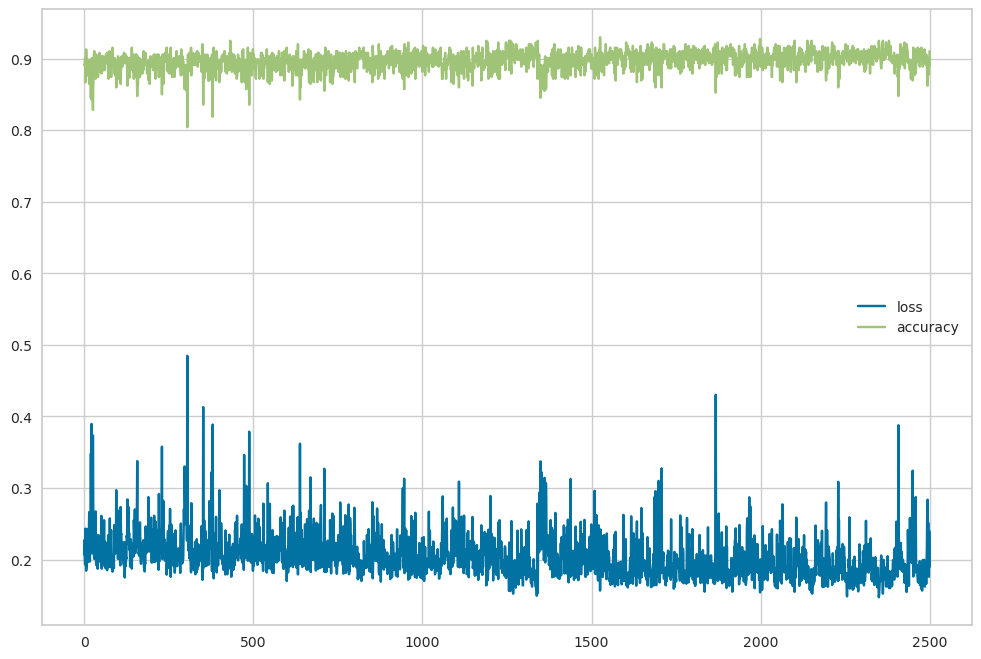

In [226]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(figsize=(12,8))

In [227]:
df3

,osmo,urea,gravity,calc
0,345,152,1.017,1.16
1,874,385,1.020,3.46
2,698,354,1.024,13.00
3,668,252,1.020,3.46
4,567,457,1.011,2.36
...,...,...,...,...
271,853,364,1.029,7.31
272,410,195,1.012,1.45
273,874,380,1.031,4.49
274,543,170,1.019,1.64


In [228]:
x_test

,osmo,urea,gravity,calc
358,956,473,1.025,9.39
350,874,382,1.021,6.99
373,725,443,1.021,3.53
399,559,317,1.017,5.38
369,364,159,1.011,2.64
...,...,...,...,...
31,694,311,1.008,1.02
283,559,317,1.017,9.39
157,577,164,1.026,1.16
203,579,297,1.019,3.93


In [229]:
df3

,osmo,urea,gravity,calc
0,345,152,1.017,1.16
1,874,385,1.020,3.46
2,698,354,1.024,13.00
3,668,252,1.020,3.46
4,567,457,1.011,2.36
...,...,...,...,...
271,853,364,1.029,7.31
272,410,195,1.012,1.45
273,874,380,1.031,4.49
274,543,170,1.019,1.64


In [230]:
tahmin = model.predict(df3)

9/9 [==============================] - 0s 3ms/step


In [231]:
rounded = [round(x[0]) for x in tahmin]
rounded[:5]

[0, 1, 1, 1, 0]

In [232]:
df1

,id,target
0,414,0.5
1,415,0.5
2,416,0.5
3,417,0.5
4,418,0.5
...,...,...
271,685,0.5
272,686,0.5
273,687,0.5
274,688,0.5


In [233]:
df2

,osmo,urea,gravity,calc,target
0,443,124,1.013,1.45,0
1,703,394,1.025,4.18,0
2,371,159,1.009,9.04,0
3,442,398,1.021,6.63,1
4,874,385,1.021,2.21,1
...,...,...,...,...,...
409,527,75,1.011,1.53,0
410,577,224,1.024,0.77,0
411,455,270,1.018,7.68,1
412,325,75,1.008,1.03,1


In [234]:
data = pd.DataFrame()

In [235]:
data["id"] = df1["id"]
data

,id
0,414
1,415
2,416
3,417
4,418
...,...
271,685
272,686
273,687
274,688


In [236]:
len(df1), len(rounded)

(276, 276)

In [237]:
data["target"] = rounded

In [238]:
data

,id,target
0,414,0
1,415,1
2,416,1
3,417,1
4,418,0
...,...,...
271,685,1
272,686,0
273,687,0
274,688,0


In [239]:
data.to_csv("my_pred.csv", index=False)